In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


%matplotlib inline

dimension de X: (100, 2)
dimension de y: (100, 1)


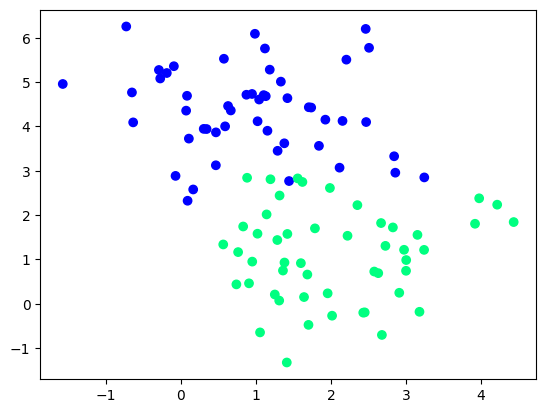

In [8]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(len(y), 1)

print('dimension de X:', X.shape)
print('dimension de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='winter')
plt.show()

In [9]:
def initialisation(X): 
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [10]:
def model(X, W, b):
    Z = X.dot(W) + b
    return Z

In [11]:
def activation(Z):
    A = 1 / (1 + np.exp(-Z))
    return A 

In [12]:
# testons
W, b = initialisation(X)
A = activation(model(X, W, b))

A.shape

(100, 1)

In [13]:
A

array([[0.90519365],
       [0.40779046],
       [0.99598466],
       [0.87724733],
       [0.6976884 ],
       [0.93564311],
       [0.98772607],
       [0.91832277],
       [0.98516653],
       [0.33931665],
       [0.99180125],
       [0.49024608],
       [0.99731015],
       [0.99009802],
       [0.78987322],
       [0.85428851],
       [0.27207266],
       [0.98359451],
       [0.39639846],
       [0.71769432],
       [0.99413561],
       [0.99070534],
       [0.90377049],
       [0.99660621],
       [0.53410038],
       [0.99423282],
       [0.30187274],
       [0.9990397 ],
       [0.99396138],
       [0.88697776],
       [0.25293957],
       [0.99347771],
       [0.56649602],
       [0.2548632 ],
       [0.93508058],
       [0.98910476],
       [0.57036291],
       [0.92600755],
       [0.9582889 ],
       [0.67537631],
       [0.93579145],
       [0.99875264],
       [0.99908268],
       [0.97761058],
       [0.93806156],
       [0.75938661],
       [0.22917227],
       [0.180

# Fonction Loss -- Log Loss

$L = -{1\over m} \sum{y \times log{(A)} + (1-y) \times log{(1-A)}}$

In [27]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [28]:
# let's try it w
log_loss(A, y)

1.9433463716360364

## Gradients

$$ \frac {\partial L }{\partial W}  = \frac {1}{m} X^T.(A - y)$$
$$ \frac {\partial L }{\partial b}  = \frac {1}{m} (A - y)$$


In [30]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [34]:
X.T.shape

(2, 100)

In [35]:
y.shape

(100, 1)

In [32]:
dW, db = gradients(A, X, y)
dW.shape

(2, 1)

# Update of features and bias

In [36]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [37]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
def neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = activation(model(X, W, b))
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

0.86


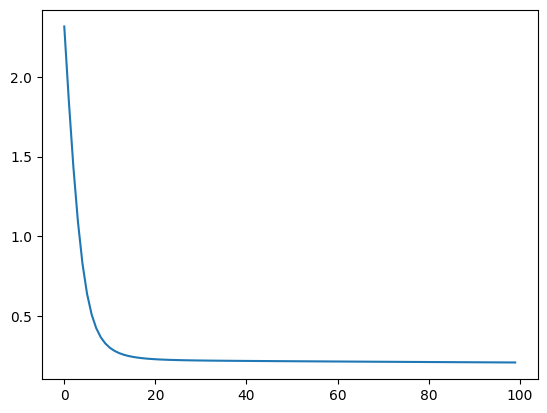

In [41]:
W, b = neuron(X, y)

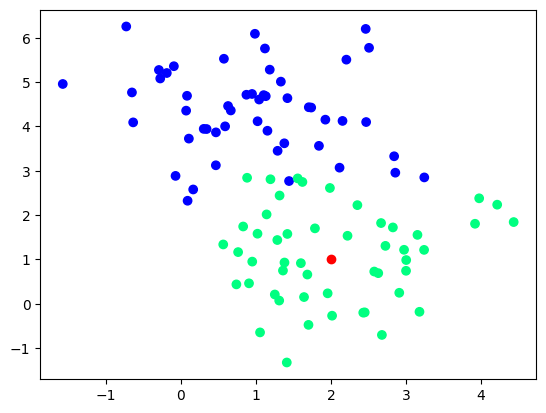

array([ True])

In [45]:
# Lets try a prediction on a new point

new_point = np.array([2,1])
plt.scatter(X[:,0], X[:, 1], c=y, cmap='winter')
plt.scatter(new_point[0], new_point[1], c='r')
plt.show()


predict(new_point, W, b)

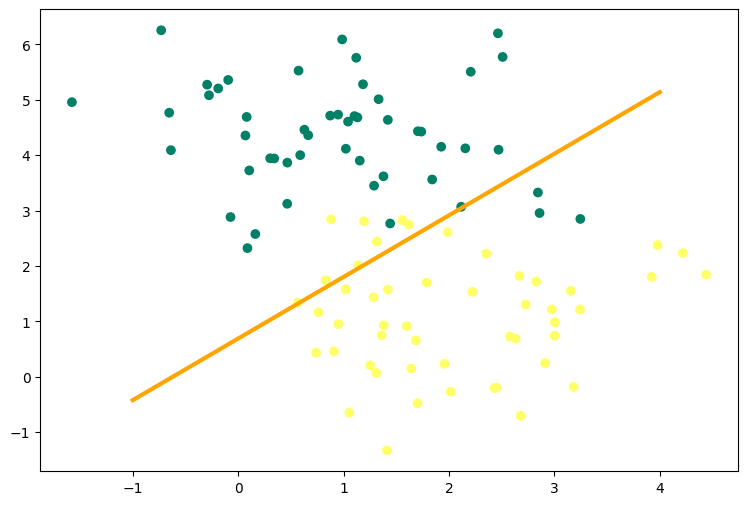

In [46]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

In [52]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed